### SOLID programming
This notebook is based on a [Linkedin online course](https://www.linkedin.com/learning/learning-solid-programming-principles)

#### why using SOLID programming
* prevent destructive interference
* class can confine the ripples of change
  + we can disentangle algorithms and data structures from operating system details
* guide us to define classes that separate the concerns and minimize the impact of changes by the following steps
  + define the common concerns (what they are)
  + then apply separation techniques by using design patterns
  + so that ripple effects can be contolled to minimize the disasters caused by changes
* as requirements evolve, software evolves. we follow well-understood design principles to repsond to changes that break existing software 
* five principles (SOLID)
  + S - single responsibility
  + O - open/closed
  + L - liskov substitution 
  + I - interface segregation
  + D - dependency inversion
* Other useful principles that work with SOLID  
  + DRY - don't repeat yourself
  + GRASP - general responsibility assignment software
  + TDD - test-driven development 
* SOLID focused on ripple effects from change and how well software fits the intended use, but are not for
  + resource use
  + performance
  + security
  + deployment
  + support
  + licensing

#### Details of five principles
* Interface segregation principle
  + classes depend on the smallest interface
  + helps design good classes
  + helps write unit test cases
* Liskov substitution principle
  + objects of some superclass S can be replaced with objects of any subclass of s
    + subclass should implement all super class methods
  + this constrains subclass design
  + helps design good polymorphism
* Open/closed principles
  + open to extension means adding subclasses as needed
  + closed to modification avoids tweaking the code to handle new situations
  + helps defining which features to expose
  + a good class can be easily extended and endlessly tweaking the class can be avoided
* Dependency inversion principle
  + about packaging the code
  + a direct dependency on a concrete class needs to be inverted to be indirect
  + depend on abstract classes or interfaces
  + avoid referencing concrete class names (concrete class name dependencies)
    + related to the concept of late binding
    + defer making connections among components until application is running
* single responsibility principle
  + summary of other principles
    + after applying the other 4 principles, the resulting class often has only one reason to change
  + one responsibility per class
  + GRASP principle will help to define a meaningful responsibility

#### interface segregation principle
* no client should be forced to depend on methods it does not use
  + this is related to how much information a collaboration class/client needs to know about features
  + a client should depend on the smallest set of interface features
  + it should depend on the narrowest interface/class with the fewest methods and attributes
    + usually the most abstract class/interface
  + otherwise, client code will be bound to irrelevant methods
* python's flexibility is very permissive
  + no compiler to obsess over method signature details
  + the cost of recompi ation can make ths principle more urgent than python
* why start with ISP?
  + ISP uses segregated classes
    + minimize the collaborator's interface
      + it foreces you to consider if the interface is as small as it can be?
  + nouns for objects in class, and verbs like read and analyze can define methods or interfaces features we want to segregate
  + ISP can lead to new classes to help narrow an interface
  + the purpose of ISP is to minimize interface of each class to segregate features
* when creating collection class we have two options
  + wrap (composition)
    + create a new class
    + define minimum features for the class
    + delegate to built-in classes
    + design patterns including Facade, Decorator, and Adapter
  + subclass (inherit)
    + create a subclass
    + inherit a lot of features
  + one solution is to subclass the python built-in list class, which has a complex interface
    + this may cause ripple when list class interface changes, but this is unlikely
    + the computations in our app may change
      + correlation
      + regression
    +
     ```python
      class Samplelist(list[Sample]):
        pass
    ```
    + the code is much simpler compared to composition, but it provides the entire list interface with too many methods
  + the other solution is to use composition to include a list object into a new class
    + we can only expose the method from list class that we want without having to extend all list methods
      + this keeps a narrow interfact, but is a kind of complex
      + we can use mypi in unit tests and find the missing features, and add the features we need so that only needed, minimum number of methods/interface are exposed
      + it does require a lot of coding to delegate the underlying class
  + as a general rule, any composition or wrapper class must delegate some or all of the real work to an underlying class
    + for a wrapper, the work is delegated to the wrapped class
    + for a complex class, the work is delegated to one or more wrapped classes
  ```python
   class SampleList:
        def __init__(self, samples: Optional[Iterable[Sample]] = None) -> None:
            self.samples = list(samples) if samples else []
        ...
        # all the other delegated methods need to be implemented
  ```
* to summarize
  + collection class is always a wrap vs. subclass decision
    + it is a core question in OO programming
  + interface segregation suggests wrapping
    + but that is not always best when using python's built-in collections
      + the ripple of class is rare
    
#### apply to use cases
* we can analyze the main function and found that this function only needs to read samples and analyze samples without knowing other information
  + to analyze what main function should know, use interface segregation distinct verbs, here Read samples and Analyze samples
    + this leads to three conceptual classes
      + sample: the foundational object we are working with
      + reader: reads a collection of sample instances from a source file
        + this separate the read behavior from the specific file format, such as csv, txt, tsv etc.     
      + analysis: this class performs analytical and modeling computations on a collection of sample instances
  + the principle of defining these classes is to
    + isolate the classes so that ripples of change to one class shouldn't impact other classes 
      + for example, if we add a new file format, we don't want to rewrite the application
    + the ultimate client, the main fucntion, should reflect the simplicity of read, analyze and report
  + we can further apply interface segregation principle to samples class    
      ```python
      from dataclasses import dataclass
       @dataclass
       class Sample:
         tach: float
         engine: float
      ```
  + now let's compare two implementations:
    + input from csv.DictReader
      ```python
      r = {"Tach": "10", "Engine": "8.04"}
      float(r["Tach"])
      ```
    + instance of sample
      ```python
       s = Sample(tach=10, engine=8.04)
       s.tach
      ```  
    + obviously, the data class implementation divorces the problem domain objects from all the file encoding considerations, including the conversion from string to float  
    + we can then starts with something like this:
    ```python
     class SampleList(list[Sample]):
        pass
   ```
     + the point here is that by starting with the name for a potential class, we separate the interface for a collection of sample instances from 
       + the process of creating and analyzing the collection
       + the sample creation can be reading from some files etc.
          + this further separate the details of reading files, including file formats etc.
          
* now let's look at reading and analyzing samples as factories for interface segregation
  + these class will be the collaborator of samples list and underlying sample classes
  + the read method contains a factory that creates sample instances
    + translate from a source representation to an object in our problem domain, including data conversion
  + ISP is one of the several principles that suggest the separate factory to build objects 
    + this factor maps a row of raw data to a sample object
      + reader object doesn't depend on the details of the rows structure and will have a simple interface

* how to test the correlation class that requires a reader object as the input?
  + is this difficult to test?
    + have to use a mock to reader class, for example (ripper of reader may affect correlation class)
  + is there any method not tested (no test coverage)? maybe unused and can be eliminated
* the basic idea of ISP is to expose only the needed interface to collaborator class to minimize the ripple effects  
+ based on the results of interface segregation distinct verbs, we can use other principles to further separate this to distinct classes



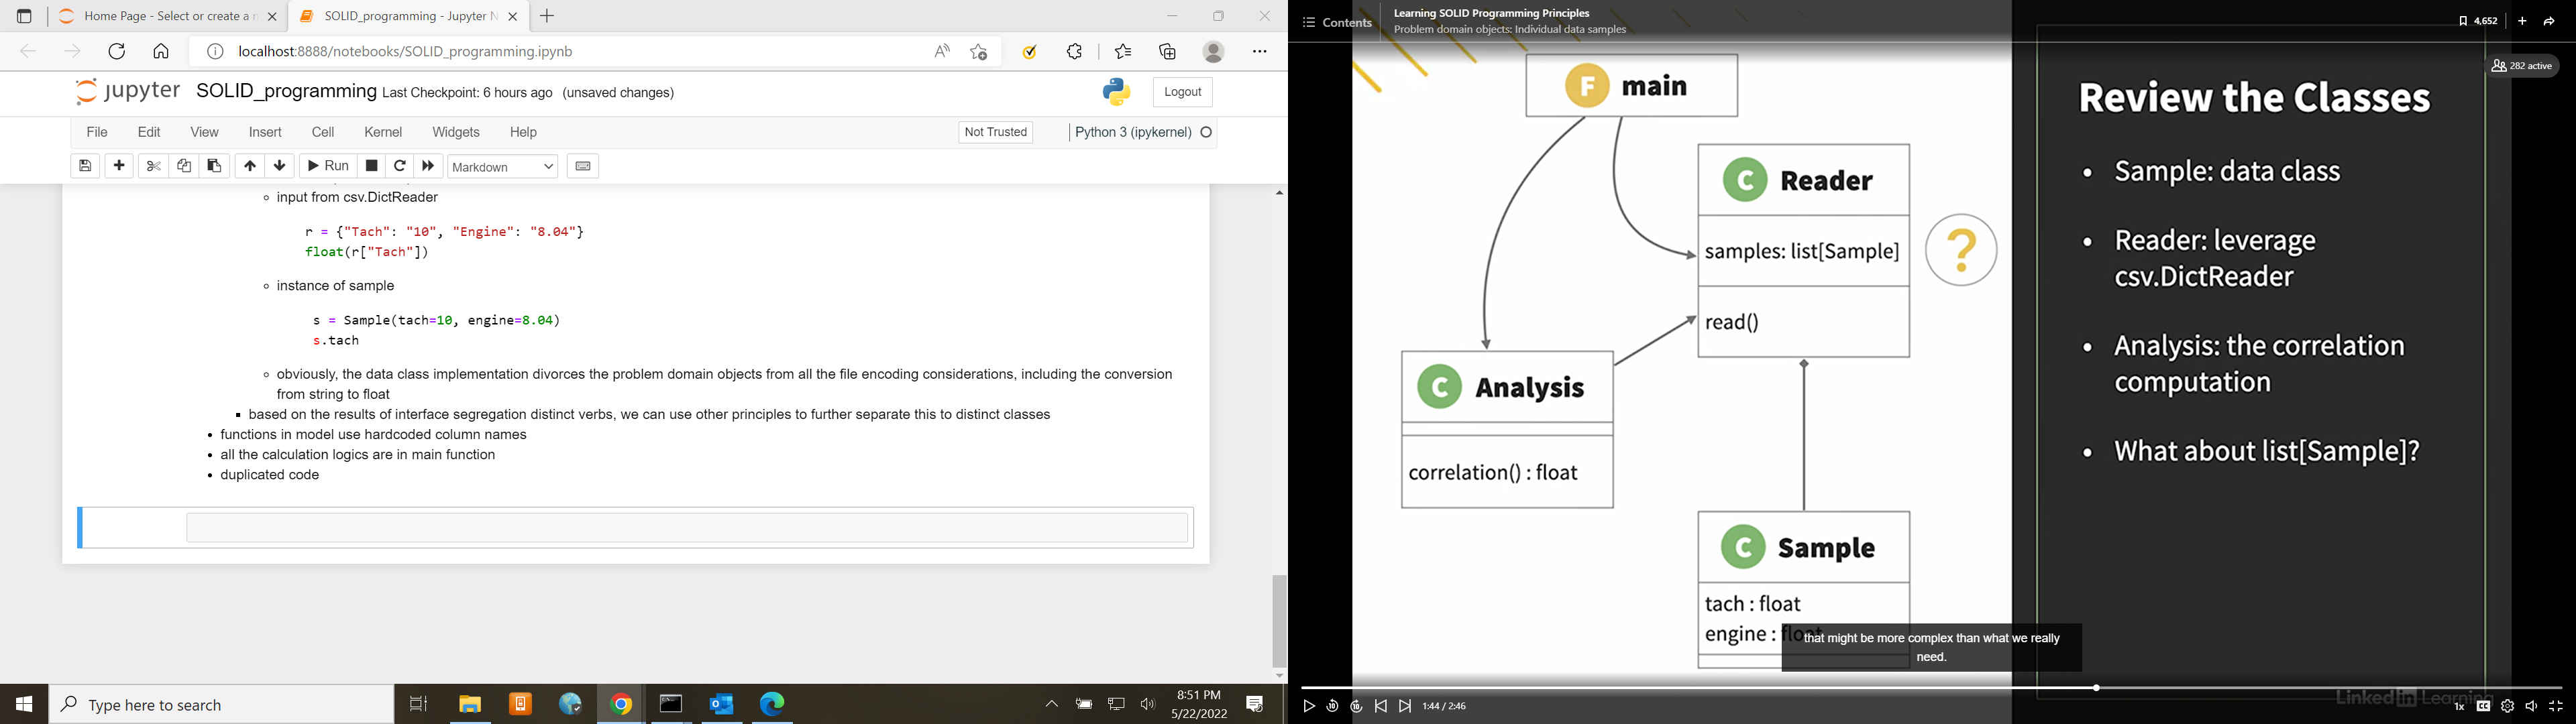

* functions in model use hardcoded column names
* all the calculation logics are in main function
* duplicated code

#### Liskov substituion principle
* replace objects of some superclass S with objects of any subclass of S without altering any of the provable properites of that program (w/o breaking the program)
  + strong behavioral subtyping
  + behavior of subclass should be as correct as the behavior of the superclass
  + subclass should implement abstract class's methods with the same signatures
  + an object declared as a super class can be replaced by any of its subclass object. this means
    + in the app, we only need to declare a superclass object, and can later on initialize subclass objects
    + in code example, we declare a Reader object, reader, initialize different subclass objects depending on suffix
      + this reader object implements different read() methods depending on file format
        + this can be set by command line argument
        + or config file
        + or suffix
     + this also allows us to use late binding. there are several advantages:
       + it allows us to choose the subclass type at runtime
       + we don't need to modify code for different file types or other conditions. we can add new subclasses with fewer ripples
* to summarize
  + subclass and superclass share the same interface
  + done right when the binding can be done as late as possible
    + ideally, binding made at runtime
      + introduce flexibility. Decision is put off until the exact file name/input conditions are know at run time
  + for subclass/substitue that have added features, the substitution can be more complex to detect, meaning
    + LSP is clear when method interfaces are the same, but for subclasses with extra features, we have alternatives
      + this is possible since python dose not require a formal definition of an abstract super class, we can utilize the duck typing of python to implement informal ISP
      + informal liskov substitution (duck typing)
        + duck typing: code doesnot have to follow strict inheritance hierarchy 
          + if I see a bird walks like a duck, swims like a duck and quacks like a duck, I call it a duck
        + in python we use duck type
          + two objects with the same methods and attributes behave like subclasses of a common super class
          + we don't use the class declaration to check if two classes are interchangeable
            + just do it by common methods and attributes
        + therefore, we can use union in mypy to combine two classes that don't share the same superclass as if they do
          + we don't need to use inheritance
            + advantages
              + simple, write classes and a type hint
              + vraiants are tolerated
            + disadvantages
              + any shared code is a separate class or funtion
              + clases aren't checked ot make sure they are actually the same
              + may result in copy/paste of the shared code
          ```python
           class CSVReader:
               def __init__(self, source: Path) -> None:
                  etc
                
            class NDJSONReader:
                def __init__(self, source: Path) -> None:
                    etc    
           
            Reader = Union[CSVReader, DNJSONReader]
           ``` 
      + typing protocol
        + Protocol in this code is not a superclass, it is a description for tools such as mypy to use
          + it formlizes a contract for alternative implementations
          + it allows duck typing subject to static analysis
          + ideal when there is minimum amount of shared code in implementations
        + advantages
          + formal defintion of waht must be common, mypy can check this fully
          + variations must exist outside the protocol
        + disadvantages
          + any shared code is a separate class or function
      ```python
        class Reader(Protocol):
            samples: list[Sample]
                
            def __init__(self, source: Path) -> None:
                ...
                
            def read(sefl) -> None:
                ...
        ```
* Interface variations
  + when subclass and superclass do not match very well
  + use case:
    + markdown files have multiple tables, and tables are like csv documents
    + if we have a markdown reader, we need to add an extra prameter (table index) in read() method to tell which table to parse
    + this will crate a LSP problem. mypy will identify this as an error (incompatible with surpertype)
      + first, we rethink if this distinction is necessary and if we can push this distinction up to superclass 
      + we then can expand the interface
        + one is to add a method unique to this subclass as a fluent interface
          + add a class instance variable self._index in __init__ method, that after super().__init__(), initialize the value to default
          + then add a method to set the index value
          + then read() method will directly refer the instance variable index, without having to add another method argument
          ```python
           elif source.suffix == ".md":
               row_generator = ... Details Omitted
               sample_builder = ... Details Omitted
                reader = MDReadr(row_generator, sample_builder)
                reader.table_index(0)
                reader.read(source)
          ```      
        + second solution is to set optional parameters with default values (very common)
* python can't check subclass methods for compatibility with superclass methods
  + no language can check the implementation to be sure the subclass adheres to superclass semantics
  + only unit tests can show Liskov substitution holds true
* LSP is to make sure subclass makes the expectation of superclass. if subclasses have extra feature, we need either re-think or refactor it
* isinstance() function should be used rarely. Use type annotations and mypy
  + one case of using it is when writing coercion rules for python's built-in types since we can't extend it. 
    ```python
    if isinstance(tach, (str, int)):
        self.tach = float(tach)
    elif isinstance(tach, float):
        self.tach = tach
     ```
* LSP check all the signatures of methods and attributs in class hierarchy
  + does method signature compatible
  + does sub-class only add features via new methods
  + make sure every subclass can replace its superclass without ripple effects to damage other parts of the app
* python does not provide static type checking at runtime, we rely on mypy  
  + misspelled name can never be caught by a compiler
  + unit tests are required to be sure subclass works correctly
  

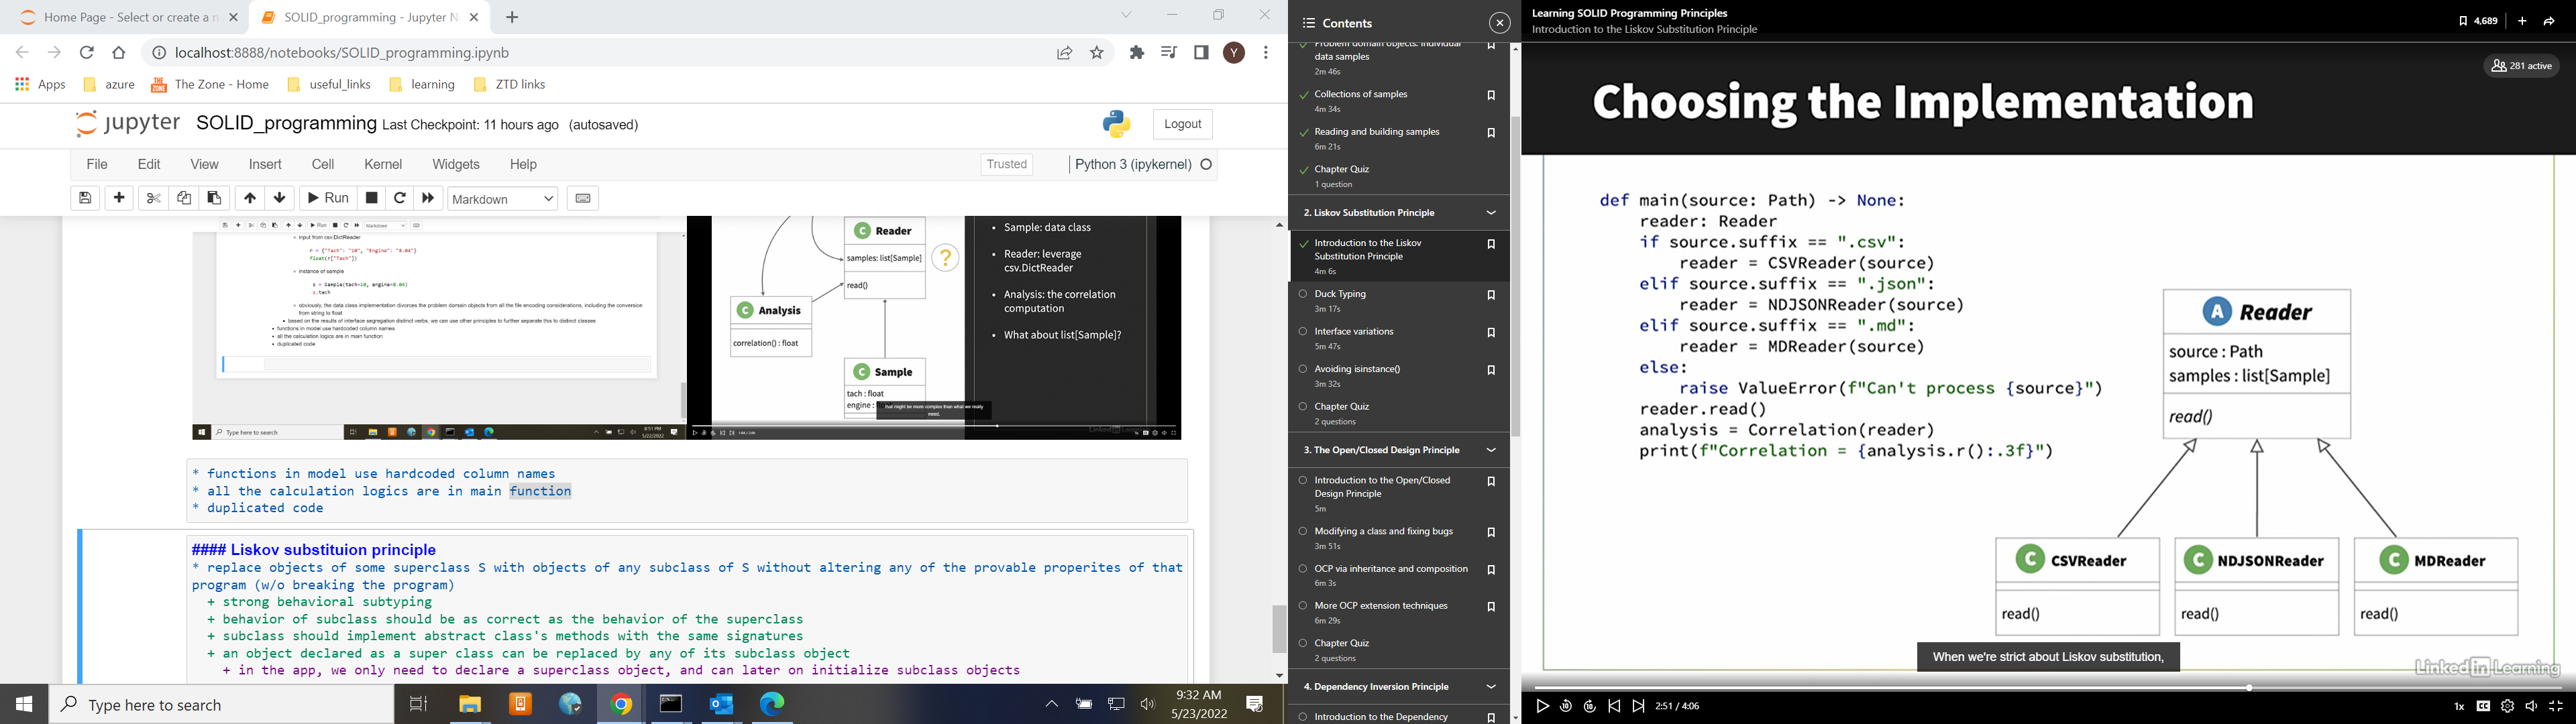